# OpenCV Tutorial

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In this tutorial we use matplotlib for ploting, because opencv generate new windows

In [43]:
def plot_image(image):
    #cv2.imwrite('res.png',img_rgb)
    fig = plt.figure(figsize=(10, 10))
    #b,g,r = cv2.split(image)
    #image = cv2.merge([r,g,b])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()


In [44]:
IMAGE_DIR = './images/'

## Basic image operations

**open images**  
First argument is image path, even if path is wrong, there wont be an error. 
Second argument specifies in what color space image should be loaded
*    **0 : cv2.IMREAD_COLOR** : Loads a color image. Any transparency of image will be neglected. It is the default flag.
*    **1 : cv2.IMREAD_GRAYSCALE** : Loads image in grayscale mode
*    **-1: cv2.IMREAD_UNCHANGED** : Loads image as such including alpha channel

In [45]:
#load as rgb
img = cv2.imread(os.path.join(IMAGE_DIR,'positive-possum.png'),1)

Get basic information about the image like pixel count and shape.

In [46]:
pixels = img.size
shape = img.shape

print(f" pixel: {pixels}")
print(f" shape of image: {shape}")

 pixel: 787500
 shape of image: (525, 500, 3)


**cv2.imshow(winname, image)** to display a image with opencv, this gnerates a new window.
 

In [47]:
cv2.imshow('positive possum', img)

This won't work very well with jupyter, thats why we use matplotlib in this tutorial

In [48]:
cv2.destroyAllWindows()

**cv2.imwrite(filename, img_to_write)** to save a image 

In [49]:
cv2.imwrite(os.path.join(IMAGE_DIR,'new_img.png'), img)

True

## Drawing funtions

In [56]:
start = (10,10)
end = (100, 500)
col = (255,0,0)
thickness = 5
line_img = img.copy()

line_img = cv2.line(line_img,start, end, col,thickness)

In [58]:
upper_left = (100,100)
bottom_right = (300, 300)
col = (255,0,0)
thickness = 5
rect_img = img.copy()

rect_img = cv2.rectangle(rect_img,upper_left,bottom_right,col,thickness)

In [59]:
center_1 = (100,100)
center_2 = (300,300)
radius = 50
col = (255,0,0)
thickness_1 = 3

#-1 then the figure is closed
thickness_2 = -1

circle_img = img.copy()
circle_img = cv2.circle(circle_img, center_1, radius, col, thickness_1)
circle_img = cv2.circle(circle_img, center_2, radius, col, thickness_2)

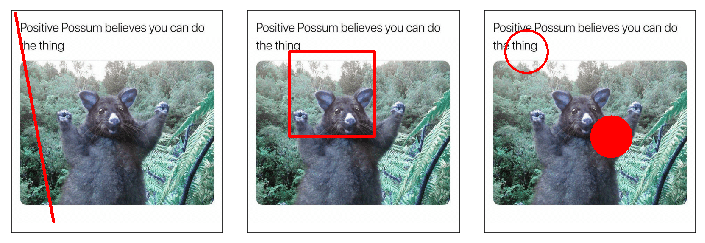

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(3, 3, 1, xticks=[], yticks=[])
plt.imshow(line_img )

ax = fig.add_subplot(3, 3, 2, xticks=[], yticks=[])
plt.imshow(rect_img)

ax = fig.add_subplot(3, 3, 3, xticks=[], yticks=[])
plt.imshow(circle_img)


plt.tight_layout()
plt.show()

## Transformation

### Scaling 

Scaling is just resizing a image.
**cv2.resize(src, dst, dsize, fx, fy, interpolation)**  
src = source image  
dst = destination image  
dsize = output image size, when zero it is computed by scr shape and fx,fy  
fx, fy= scale factor for x and y  
interpolation = flag for diffrent [interpolation methods](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

In [51]:
resized_img = cv2.resize(img, None,fx=0.5, fy=0.5)

### Affine transformation
With affine transformation parallel lines in the scoure image will still be parallel in the output image. The wrapAffine function takes a 3x2 transformation matrix as input. **dst = cv2.warpAffine(source_image,transformation_matrix,(img_cols,img_rows))** 

### Translation  
Use Translation to shift a image in x and/or y direction. Therefor you have to calculate a translation matrix M. 


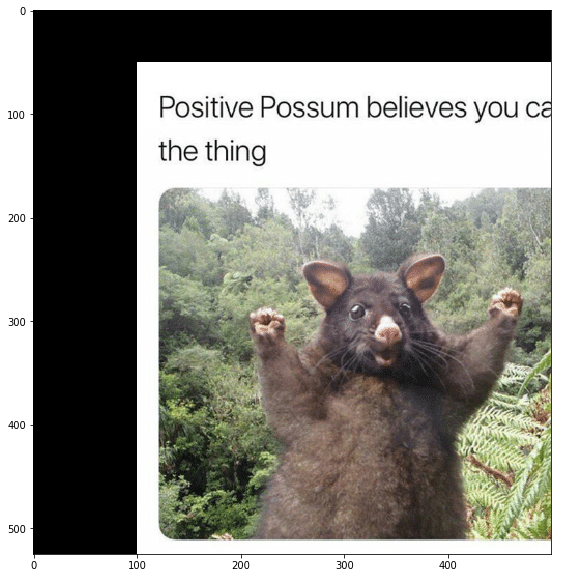

In [52]:
rows,cols, _ = img.shape
t_x = 100
t_y = 50

M = np.float32([[1,0,t_x],[0,1,t_y]])
dst = cv2.warpAffine(img,M,(cols,rows))

plot_image(dst)

### Rotation
Rotation of an image for an angle θ is achieved by the transformation matrix of the form M=[cosθsinθ−sinθcosθ]

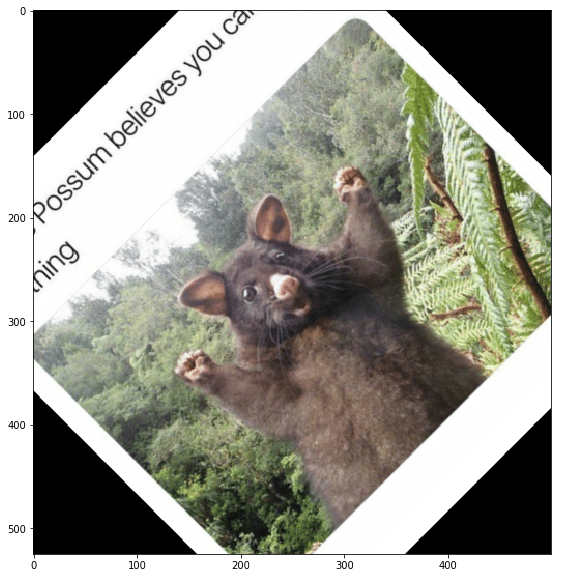

In [30]:
rows, cols, _ = img.shape
angle = 45

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plot_image(dst)

### Fliping  a image  
**cv2.flip(soure_image, flip_code)**  

**flip_code = 0** flips around x  
**flip_code = 1** flips around y  
**flip_code = -1** flips around x and y

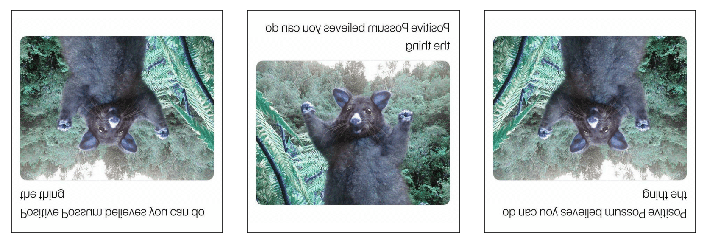

In [31]:
x_flipt= cv2.flip(img, 0)
y_flipt= cv2.flip(img, 1)
xy_flipt= cv2.flip(img, -1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(3, 3, 1, xticks=[], yticks=[])
plt.imshow(x_flipt )

ax = fig.add_subplot(3, 3, 2, xticks=[], yticks=[])
plt.imshow(y_flipt)

ax = fig.add_subplot(3, 3, 3, xticks=[], yticks=[])
plt.imshow(xy_flipt)


plt.tight_layout()
plt.show()

### Transformation
For transformation we need three point coordinates from input image and their location in the output image. This points are used as input values for **cv2.getAffineTransfomation(orig_points, out_points)**

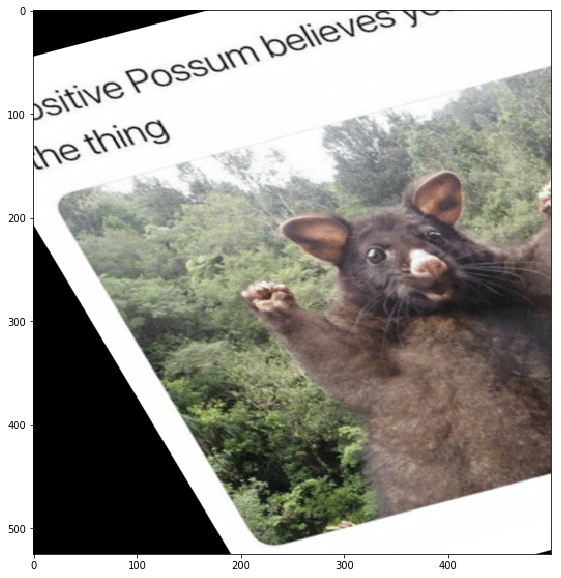

In [28]:
rows,cols, _ = img.shape

orig_pts = np.float32([[50,50],[200,50],[50,200]])
out_pts = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))
plot_image(dst)

### perspective transformation 



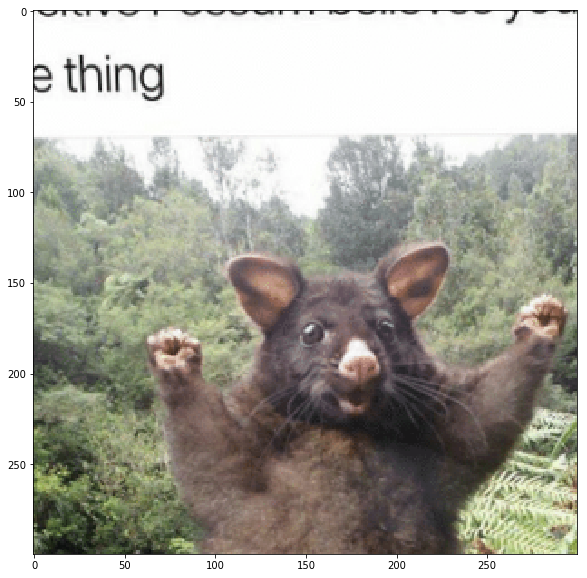

In [34]:
rows,cols,ch = img.shape

input_points = np.float32([[50,65],[368,52],[28,387],[389,390]])
out_points = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(input_points,out_points)

dst = cv2.warpPerspective(img,M,(300,300))
plot_image(dst)

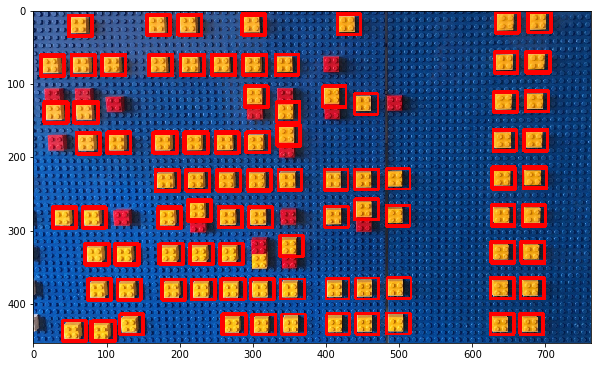

In [7]:
factor_x=0.3
factor_y=0.3

#Load images as RGB, be careful openCV use BGR
img_rgb = cv2.imread(IMAGE_DIR+'test_img.jpg')

#resize the image by factor 0.3 at each dimension
img_rgb = cv2.resize(img_rgb, None, fx=factor_x, fy=factor_y)

#convert image to gray-scale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

#load template as gray-scale image and resize with same factor as above
template = cv2.imread(IMAGE_DIR+'brick.png',0)
template = cv2.resize(template, None, fx=factor_x, fy=factor_y)

#get width and heigth of template 
w, h = template.shape[::-1]

#search for template inside the image, only if threshold >= 0.8 than 
#its accepted as match
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.77
loc = np.where( res >= threshold)

#draw a rectangle for every match in the image, 
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    
plot_image(img_rgb)